### Disclaimer: 

This whole Jupyter notebook tutorial has been downloaded from the github page: 

https://github.com/Pitsillides91/Python-Tutorials/tree/master/Seaborn%20Tutorial

Very minor changes have been made in the data-loading part (because that is folder-specific), but the rest has been kept intact.

**The notebook author has a 3 20-minute videos on Youtube where he goes through all of these cells and explains everything, so those of you who are interested can watch the videos since they are very informative! (Not sponsored :) )**

The link to part 1 is: https://www.youtube.com/watch?v=Pkvdc2Z6eBg&list=PLagzZ8RIKbFCdjs4pZZoMikTcmFjTIiVS&index=10

# Python Seaborn Tutorial for Beginners

## What is Seaborn?

- Python Data Visualization Library - based on Matplotlib (see previous tutorial)
- Used for plotting statistical graphs, identifying trends, relationships & outliers
- In my opinion, Seaborn is easier & faster to use (less code) Vs MatPlotLib

## Tutorial Overview

- What is matplotlib and how/why it's used


- Trend Plots:
    - Line Plots
    
    
- Summary Plots:
    - Bar Plots
    
    
- Distribution of Data:
    - Histogram
    - Box Plots
    
    
- Relationship Plots
    - Scatter Plots
    - lmplot (combo of regplot() and FacetGrid)
    
    
- Holistic views / Combo:
    - Sub Plots
    - Pair Plots
    - Join Plots
    
    
- Correlation / Relationships:
    - Heat Maps

## Tutorial Overview by video (from the author, see link above!)


### Video 1:
1. What is matplotlib and how/why it's used
2. Line Plots
3. Bar Plots
4. Histogram

### Video 2:
5. Box Plots
6. Scatter Plots
7. lmplot (combo of regplot() and FacetGrid)

### Video 3:
8. Sub Plots
9. Pair Plots
10. Join Plots
11. Heat Maps

## Importing / Installing packages



In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Loading the Raw Data


In [3]:
# Loading the data

raw_data = pd.read_csv("marketing_raw_data.csv")
# runs all the data
raw_data

print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(182, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


## 2. Line Graph

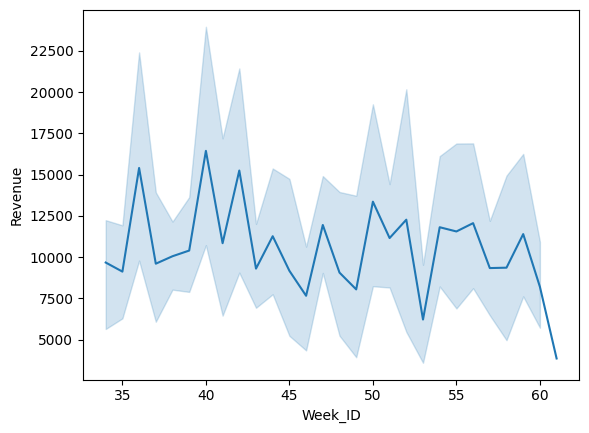

In [4]:
# Example 1 - Simple 1 line graph
# Assuming we want to investigate the Revenue by Date

ax = sns.lineplot(x='Week_ID', y='Revenue', data = raw_data)

# Notes: error bands show the confidence interval

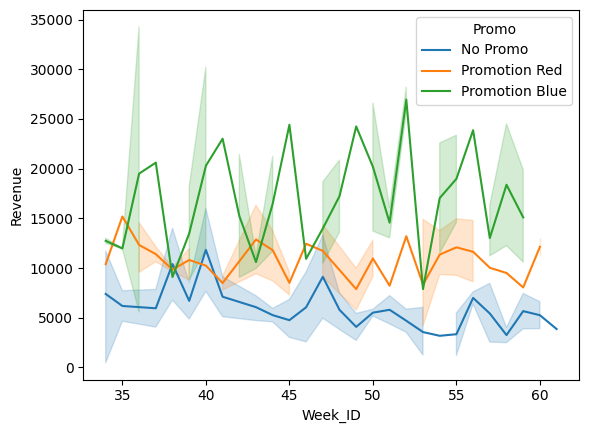

In [5]:
# Example 2 - Adding Categories

# By Promo
ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', data = raw_data)


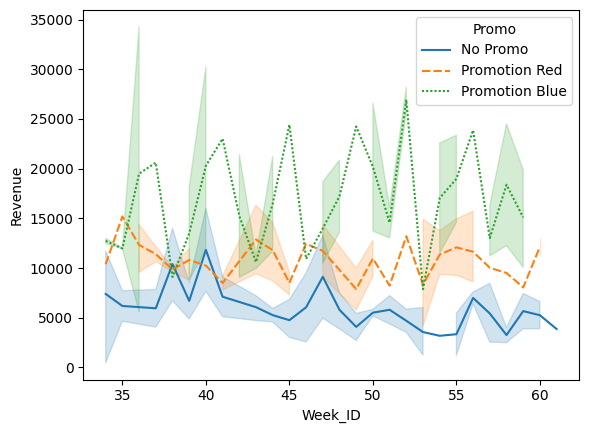

In [6]:
# Example 3 - By Promo with style
ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data)

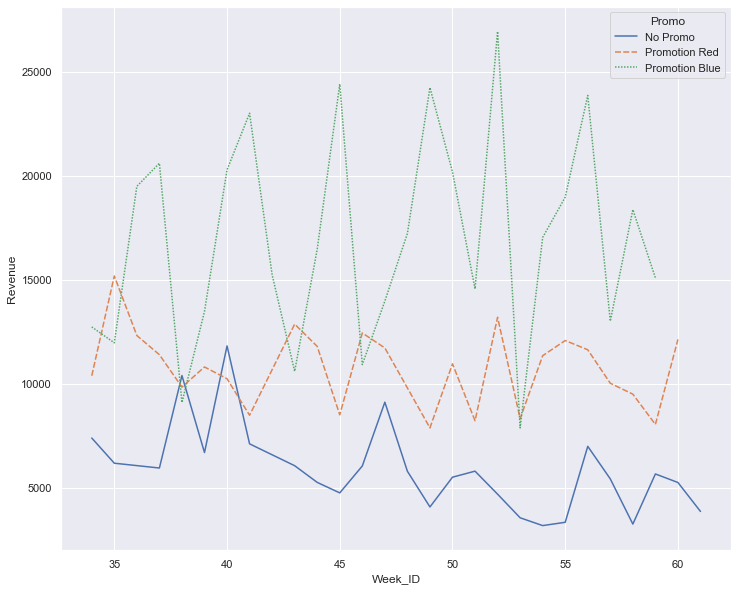

In [6]:
# Example 4 - By Promo with style & Increase the size & Remove error bars

# increase the size
sns.set(rc={'figure.figsize':(12,10)})

ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data, errorbar=None)

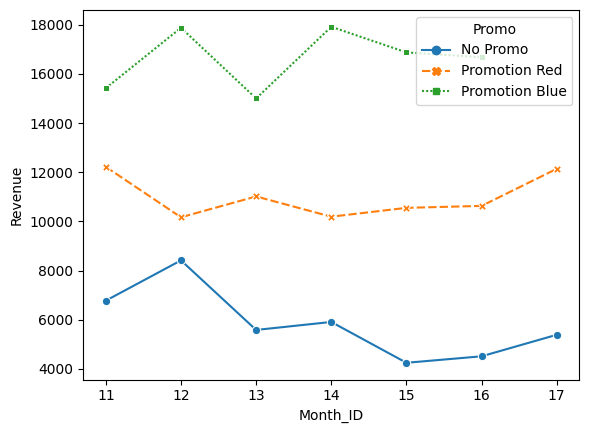

In [9]:
# Example 5 - By Promo with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Month_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data, errorbar=None,  markers=True)

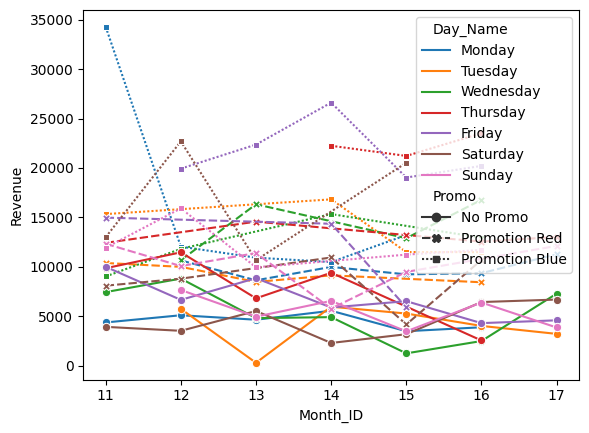

In [11]:
# Example 6 - By Day_Name with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Month_ID', y='Revenue', hue = 'Day_Name', style = 'Promo', data = raw_data, errorbar=None,  markers=True)

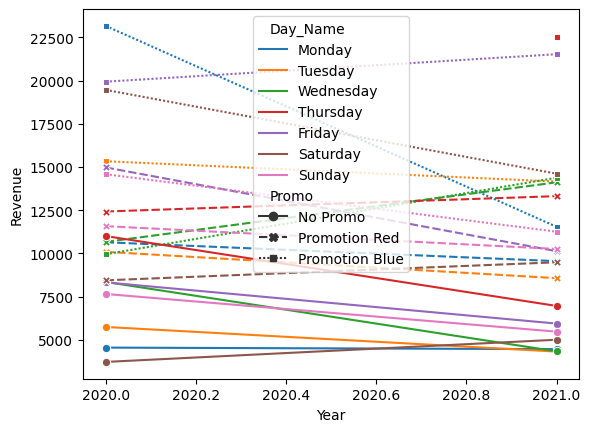

In [12]:
# Example 7 - By Year with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Year', y='Revenue', hue = 'Day_Name', style = 'Promo', data = raw_data, errorbar=None,  markers=True)

### LinePlot Documentation

Here you can find everything (or most of it at least) that you need to know about the 'lineplot' function in Seaborn.

https://seaborn.pydata.org/generated/seaborn.lineplot.html 

## 3. Bar Plots

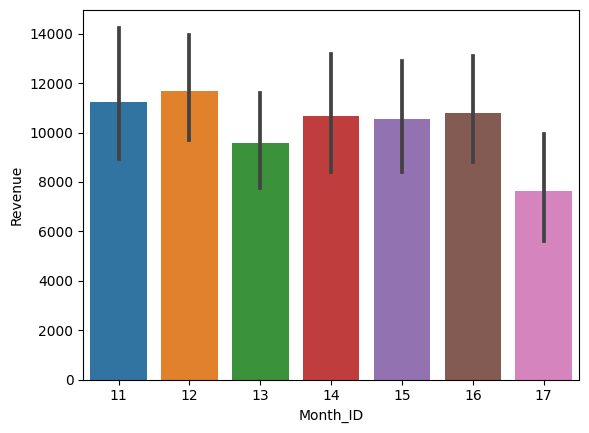

In [13]:
# Example 1 - Total Revenue by Month

ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data)

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['Month_ID', 'Revenue', 'Visitors']].groupby('Month_ID', as_index = False)#.agg({'Revenue':'mean'})

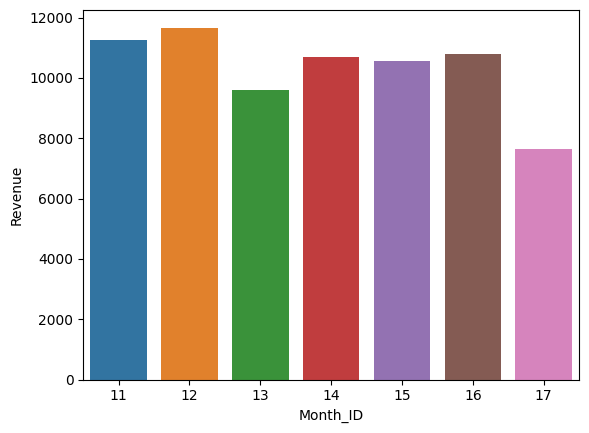

In [18]:
# Example 2 - Total Revenue by Month - Remove the Confidence Interval
ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data, errorbar=('ci',False))

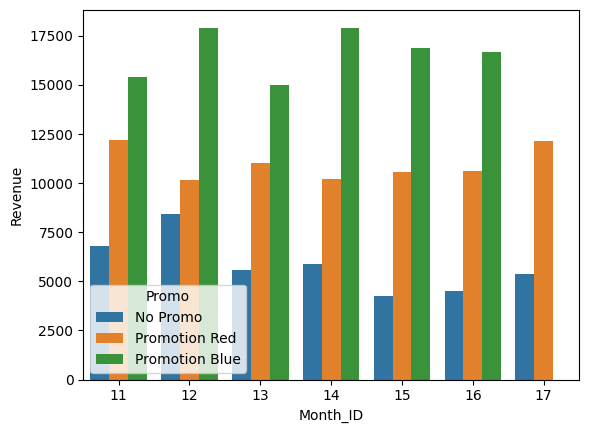

In [19]:
# Example 3 - Total Revenue by Month - Remove the Confidence Interval - By Promo
ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data, errorbar=('ci',False), hue = 'Promo')

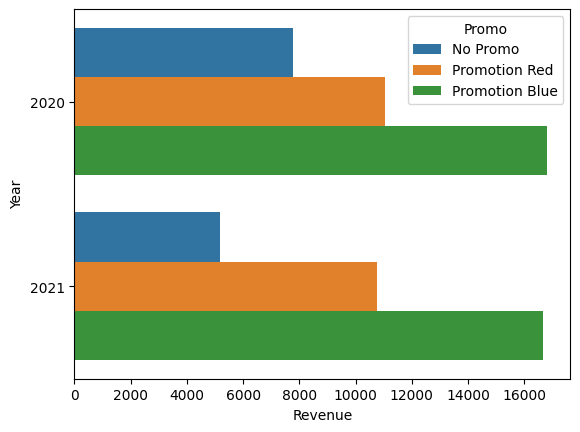

In [21]:
# Example 4 - Total Revenue by Month - Remove the Confidence Interval - By Promo - Changing direction
ax = sns.barplot(x="Revenue", y="Year", errorbar=('ci',False), hue = 'Promo', orient = 'h', data=raw_data)


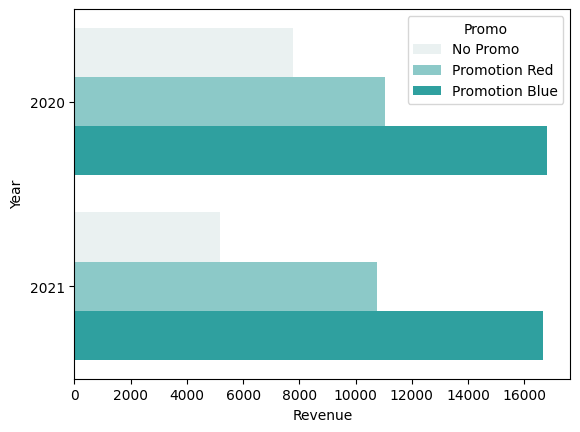

In [22]:
# Example 5 - Total Revenue by Month - Remove the Confidence Interval - By Promo - Changing direction - Changing Colour
ax = sns.barplot(x="Revenue", y="Year", errorbar=('ci',False), hue = 'Promo', orient = 'h', data=raw_data, color="#1CB3B1")

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/


## 4. Histograms

/tmp/ipykernel_98302/475464643.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


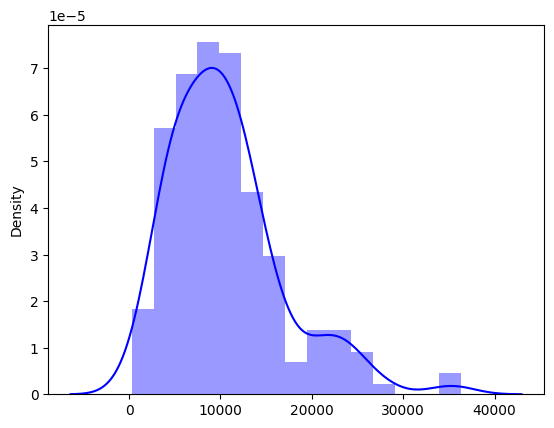

In [23]:
# Example 1 - Investigating the distribution of Revenue

x = raw_data['Revenue'].values

sns.distplot(x, color = 'blue');

# As you can see, it's a bit imbalance. Right skewd distribution as the mean is to the right

C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


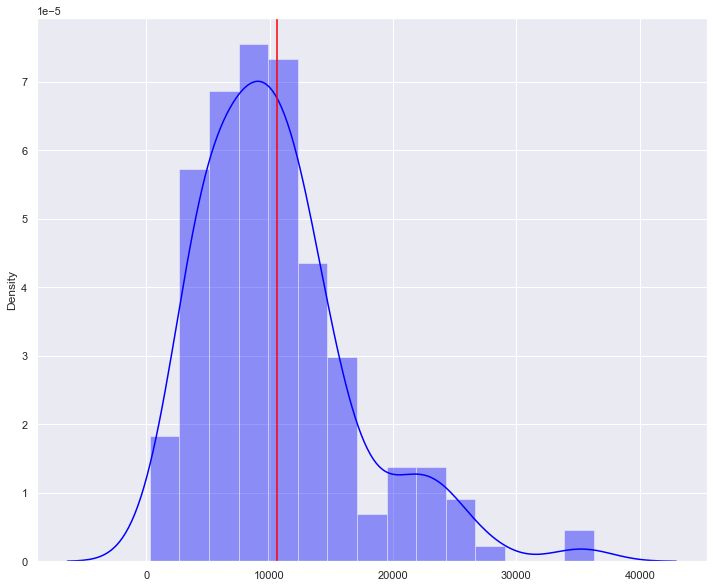

In [16]:
# Example 2 - Investigating the distribution of Revenue, adding the mean

x = raw_data['Revenue'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['Revenue'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


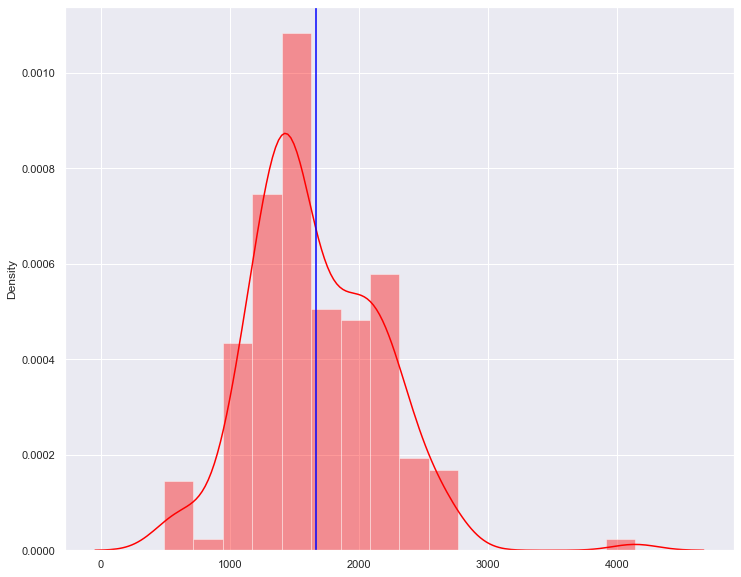

In [17]:
# Example 3 - Investigating the distribution of Visitors, adding the mean

x = raw_data['Visitors'].values

sns.distplot(x, color = 'red');

# Calculating the mean
mean = raw_data['Visitors'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'blue')

## 5. Box Plots

The meadian is:  9452.0


C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


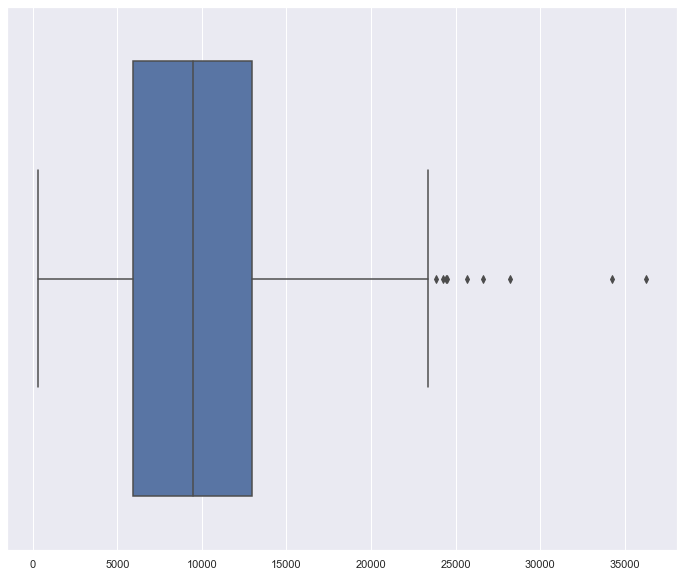

In [18]:
# Example 1 - Investigating the distribution of Revenue

x = raw_data['Revenue'].values

ax = sns.boxplot(x)

print('The meadian is: ', raw_data['Revenue'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

#### More Details
More details here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
Credits: Michael Galarnyk


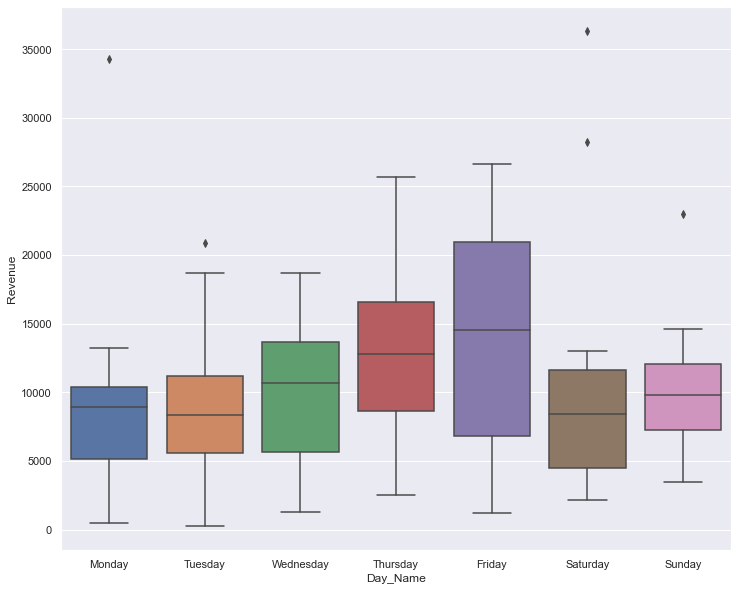

In [19]:
# Example 2 - Investigating the distribution of Revenue by Day

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data)

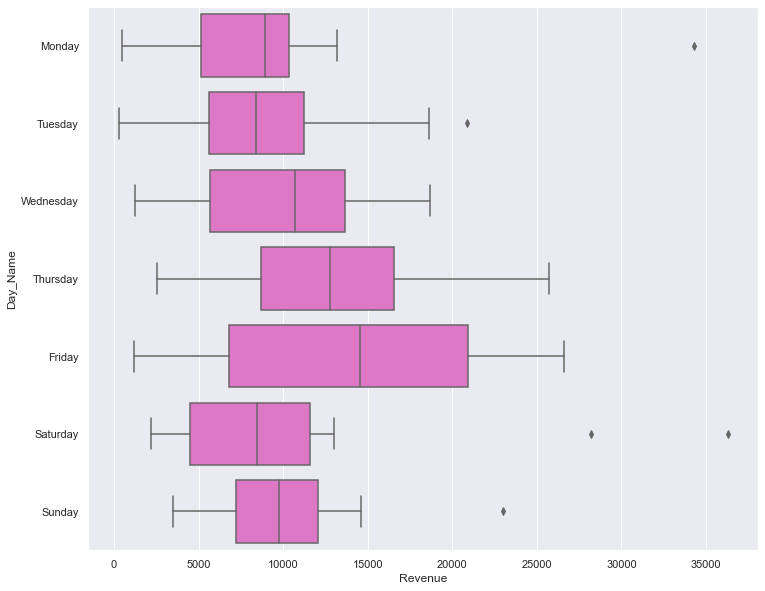

In [20]:
# Example 3 - Investigating the distribution of Revenue by Day - Horizontal - change color

ax = sns.boxplot(x="Revenue", y="Day_Name", data=raw_data, color = '#EE67CF')

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

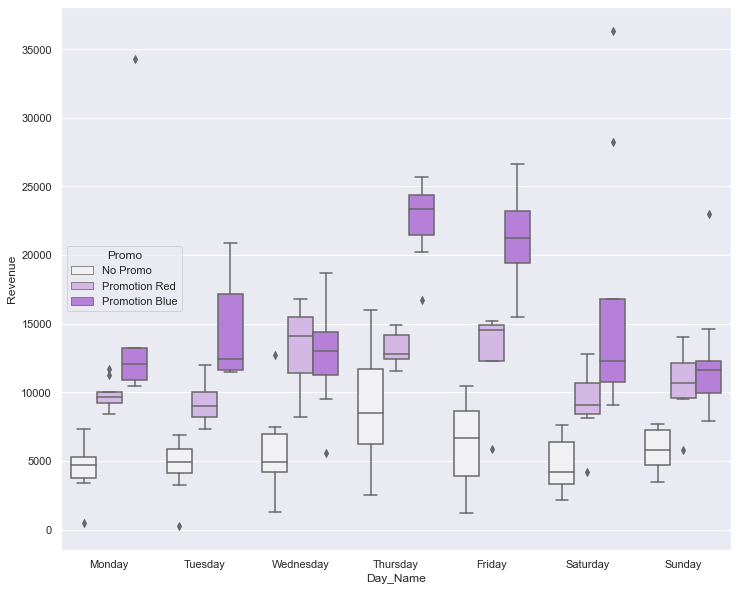

In [21]:
# Example 4 - Investigating the distribution of Revenue by Day - changing color - adding hue

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data, color="#B971E7", hue = 'Promo')

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

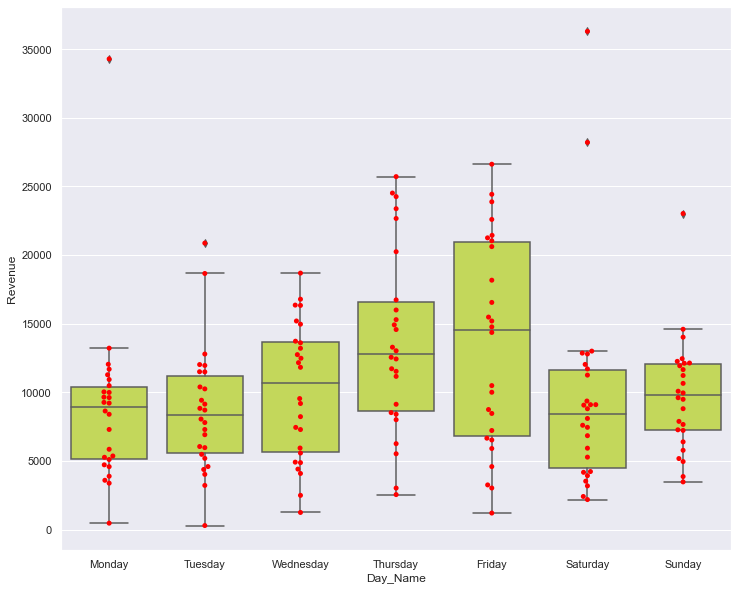

In [22]:
# Example 5 - Investigating the distribution of Revenue by Day - by color - by data points

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data, color = '#D1EC46')
ax = sns.swarmplot(x="Day_Name", y="Revenue", data=raw_data, color="red")

### More on Boxplots here:
https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

## 6. ScatterPlots

In [23]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

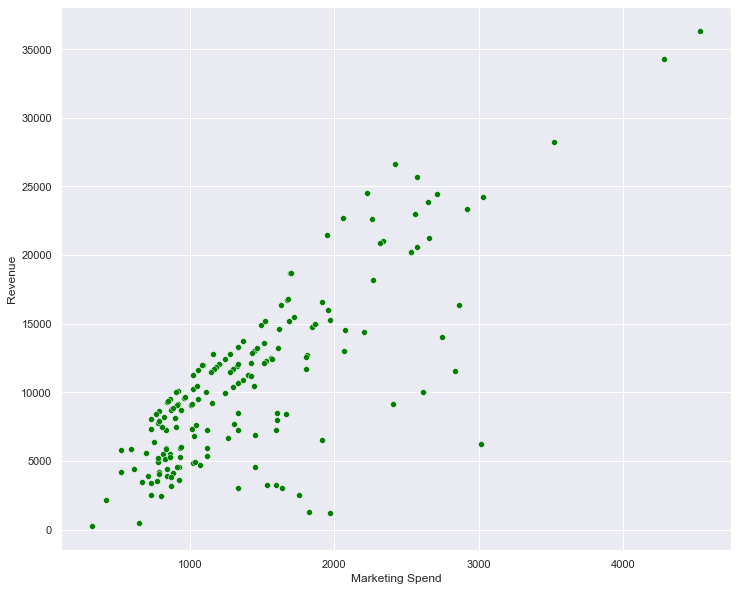

In [24]:
# Example 1 - Relationship between Marketing Spend and Revenue

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green')

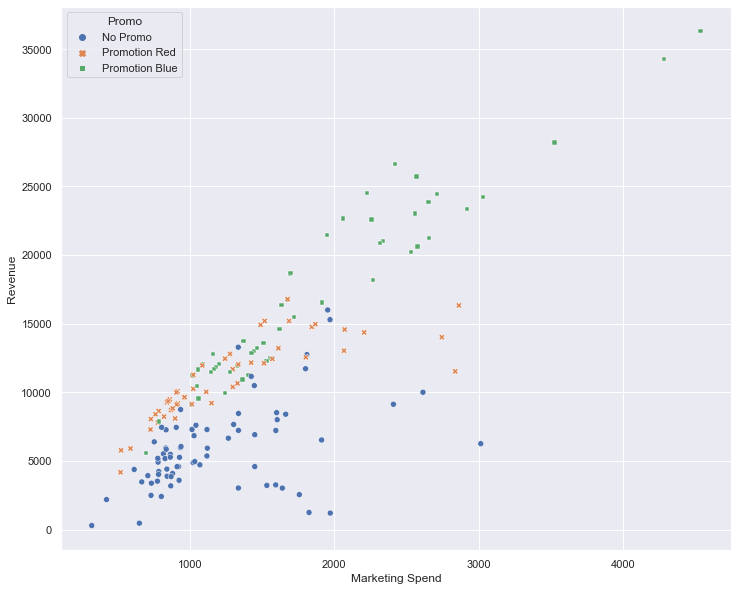

In [25]:
# Example 2 - Relationship between Marketing Spend and Revenue - changing color, hue & Style

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green', hue = 'Promo', style = 'Promo')

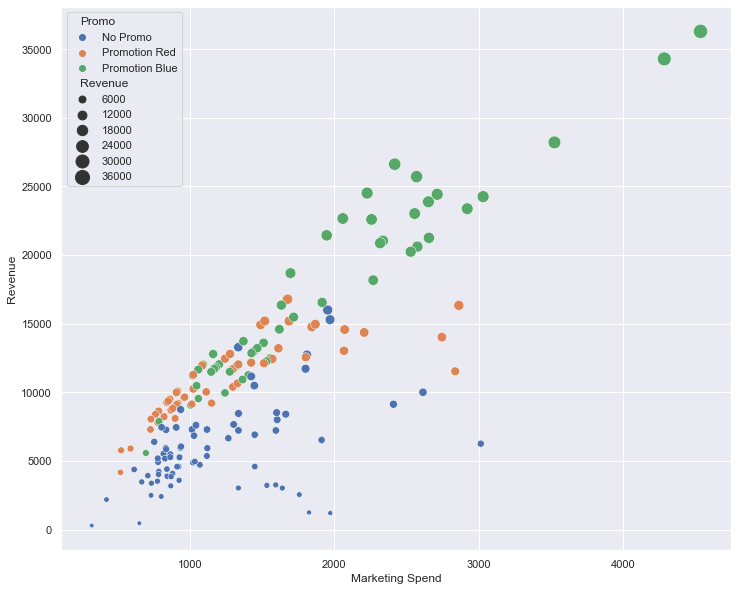

In [26]:
# Example 3 - Relationship between Marketing Spend and Revenue - changing color & hue - adding size

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green', hue = 'Promo', size = 'Revenue',
                    sizes=(20, 200))

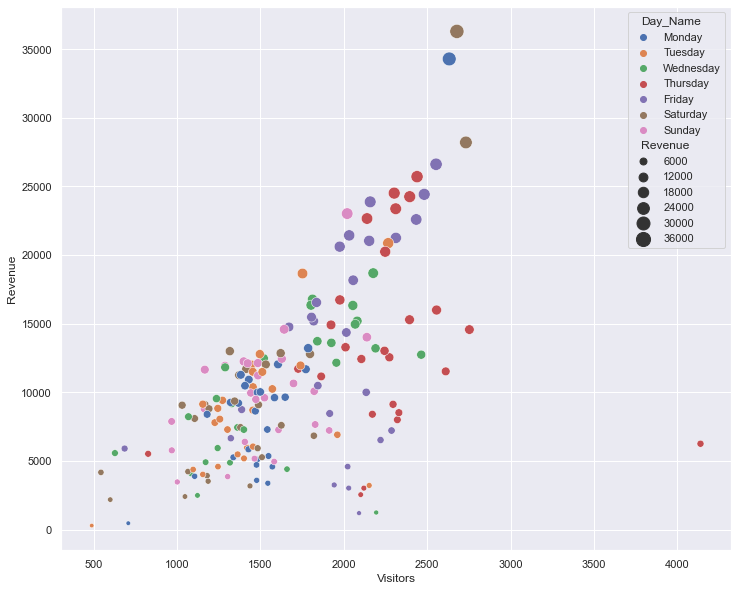

In [27]:
# Example 4 - Relationship between Marketing Spend and Revenue - changing color & hue - adding size - by day

ax = sns.scatterplot(x="Visitors", y="Revenue", data=raw_data, color = 'green', hue = 'Day_Name', size = 'Revenue',
                    sizes=(20, 200))

## 7. lmPlots

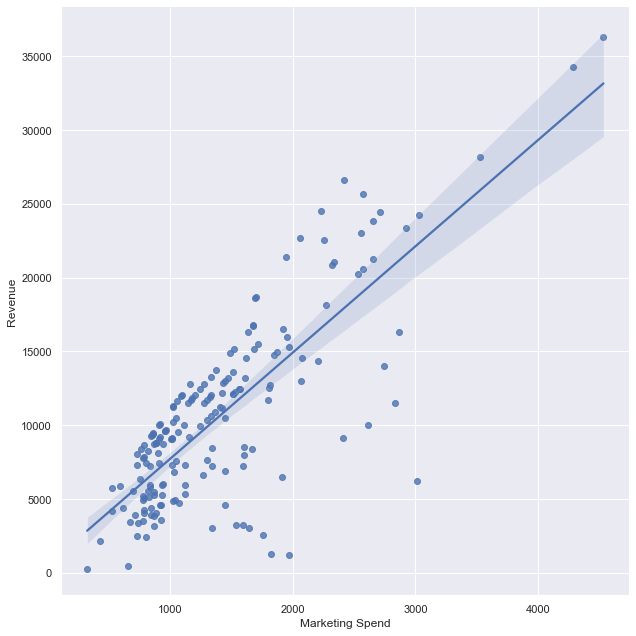

In [28]:
# Example 1 - Relationship between Marketing Spend and Revenue

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, height=9)

# Notes:
# What is Linear Regression: It is a predictive statistical method for modelling the relationship between x (independent variable) & y (dependent V).
# How it works (cost function MSE): https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

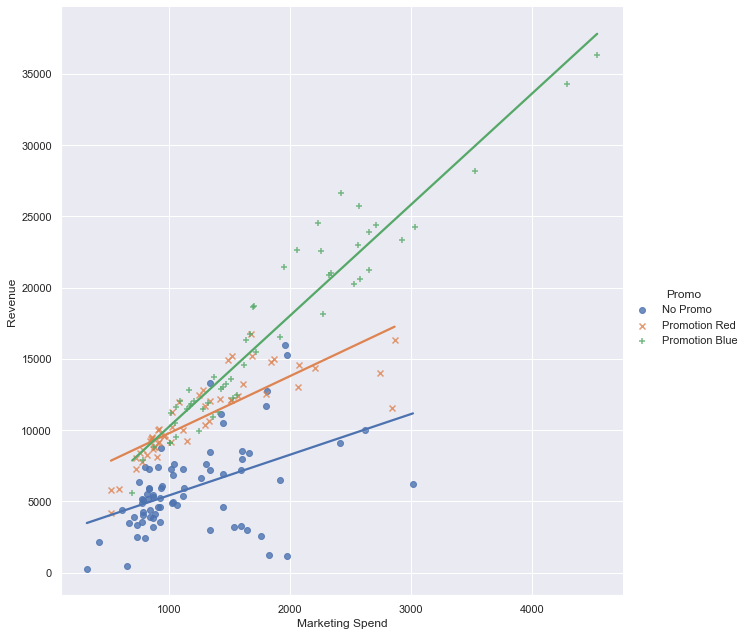

In [29]:
# Example 2 - Relationship between Marketing Spend and Revenue - changing color, hue & Style

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, hue = 'Promo', ci= False, height=9, markers=["o", "x", "+"])

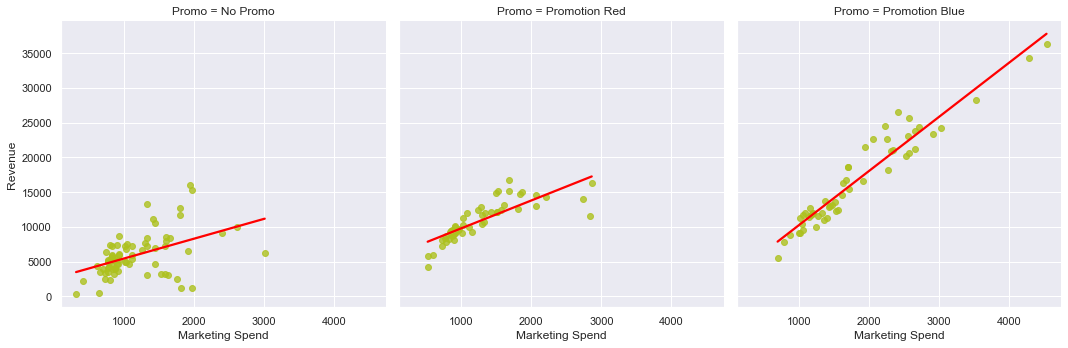

In [30]:
# Example 3 - Relationship between Marketing Spend and Revenue - by column

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, col = 'Promo', ci= False, height=5, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'#ADC11E'})

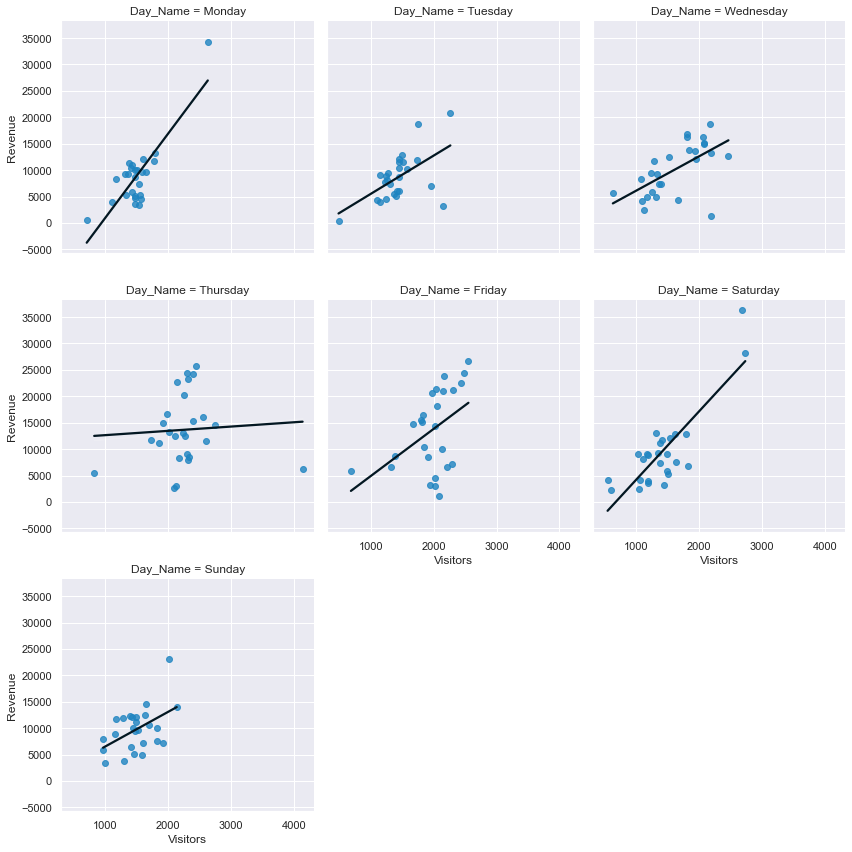

In [31]:
# Example 4 - Relationship between Marketing Spend and Revenue - by column - by day - add Jitter too

ax = sns.lmplot(x="Visitors", y="Revenue", data=raw_data, col = 'Day_Name', ci= False, height=4, 
                line_kws={'color': '#031722'}, 
                scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

## 8. SubPlots

C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

<AxesSubplot:xlabel='Revenue', ylabel='Day_Name'>

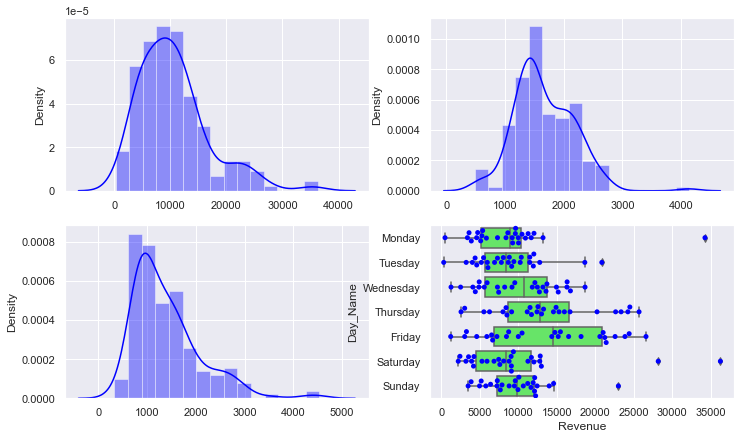

In [32]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

a = raw_data['Revenue'].values
b = raw_data['Visitors'].values
c = raw_data['Marketing Spend'].values


# plot 1
sns.distplot(a, color = 'blue', ax=axes[0,0])

# plot 2
sns.distplot(b, color = 'blue', ax=axes[0,1])

# plot 3
sns.distplot(c, color = 'blue', ax=axes[1,0])

# plot 4
sns.boxplot(x="Revenue", y="Day_Name", data=raw_data, color = '#52F954', ax=axes[1,1])
sns.swarmplot(x="Revenue", y="Day_Name", data=raw_data, color="blue", ax=axes[1,1])

## 9. Pairplots

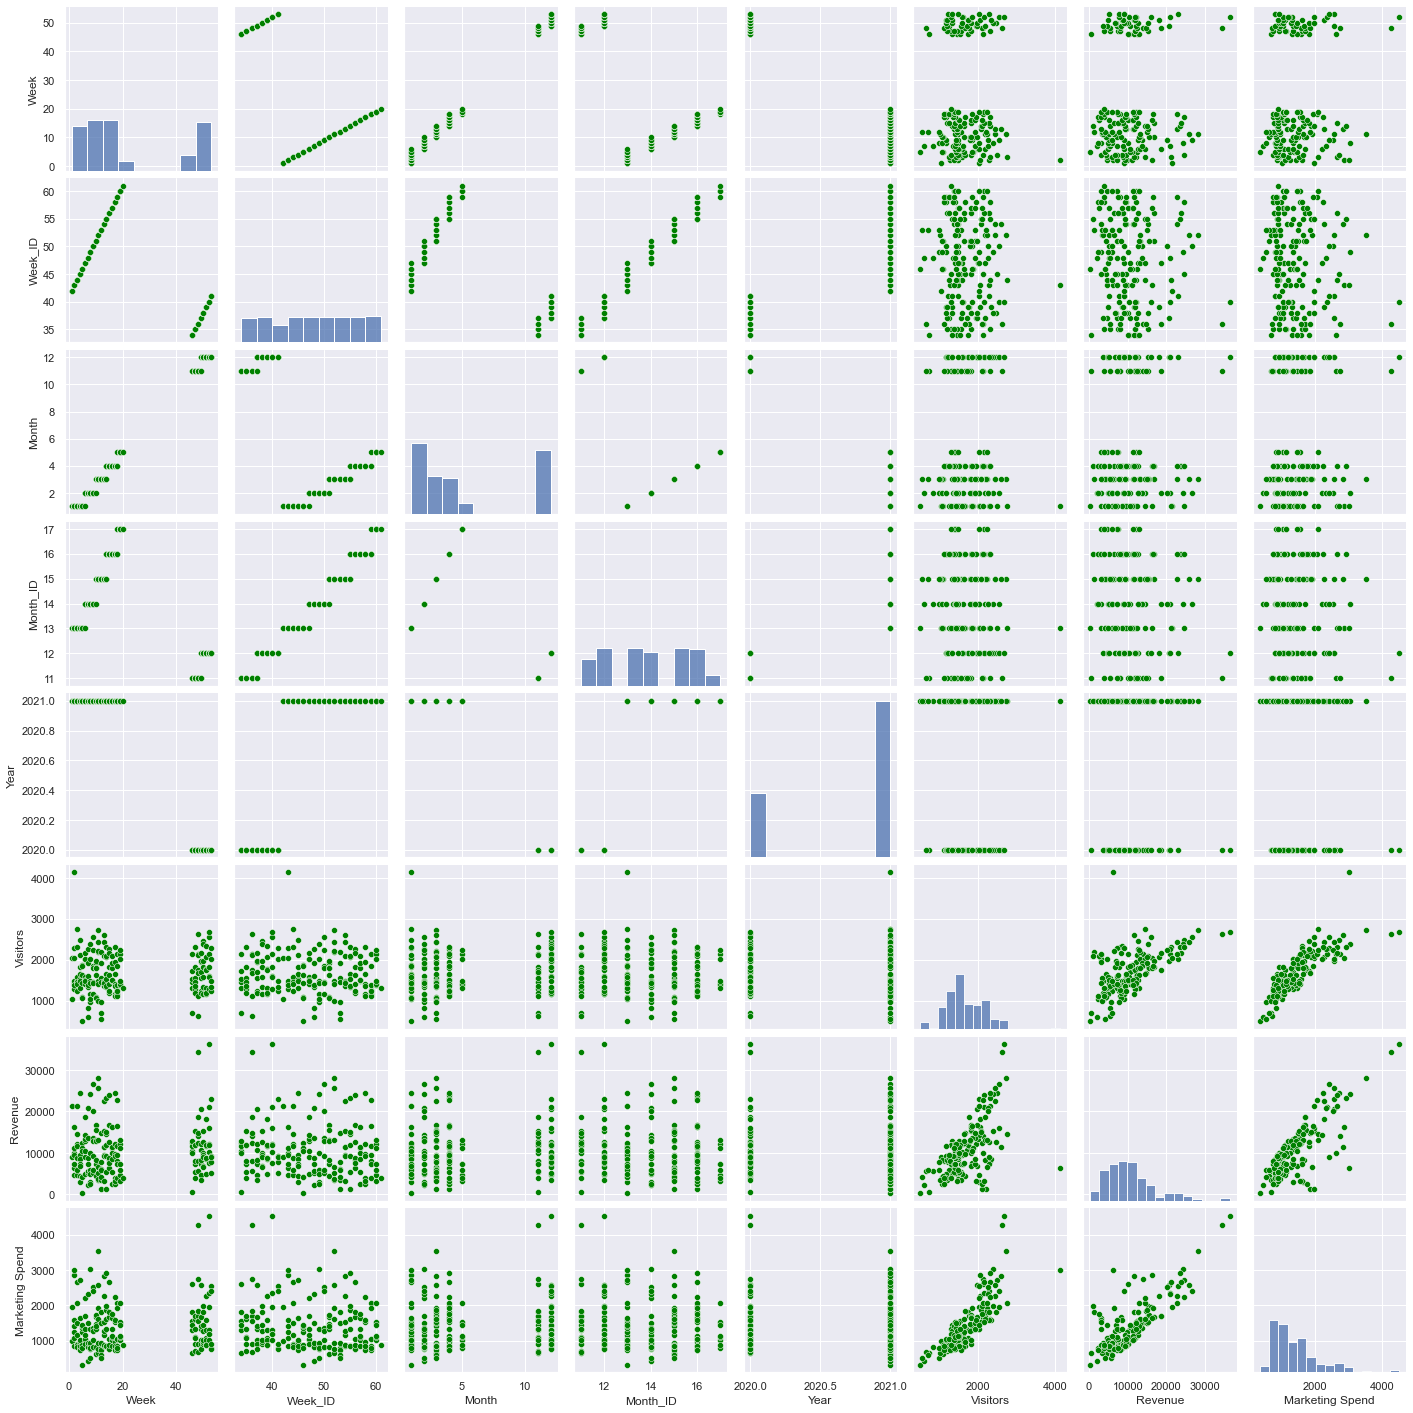

In [33]:
# Example 1 - running on all dataframe - green color
g = sns.pairplot(raw_data, plot_kws={'color':'green'})


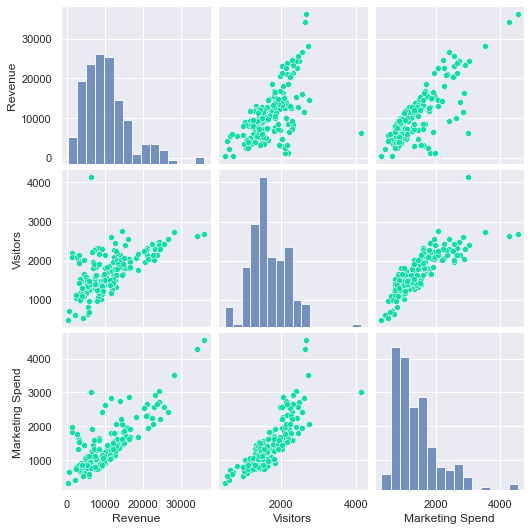

In [34]:
# Example 2 - running on specific columns - green color
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend']], plot_kws={'color':'#0EDCA9'})

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

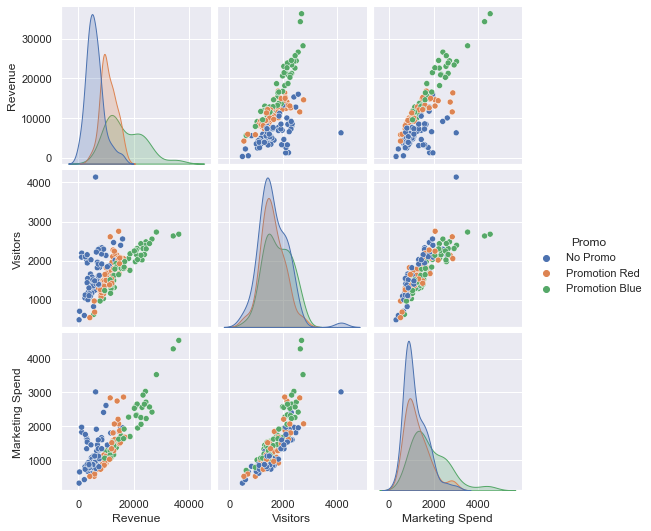

In [35]:
# Example 3 - running on specific columns - adding hue
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']], hue = 'Promo')


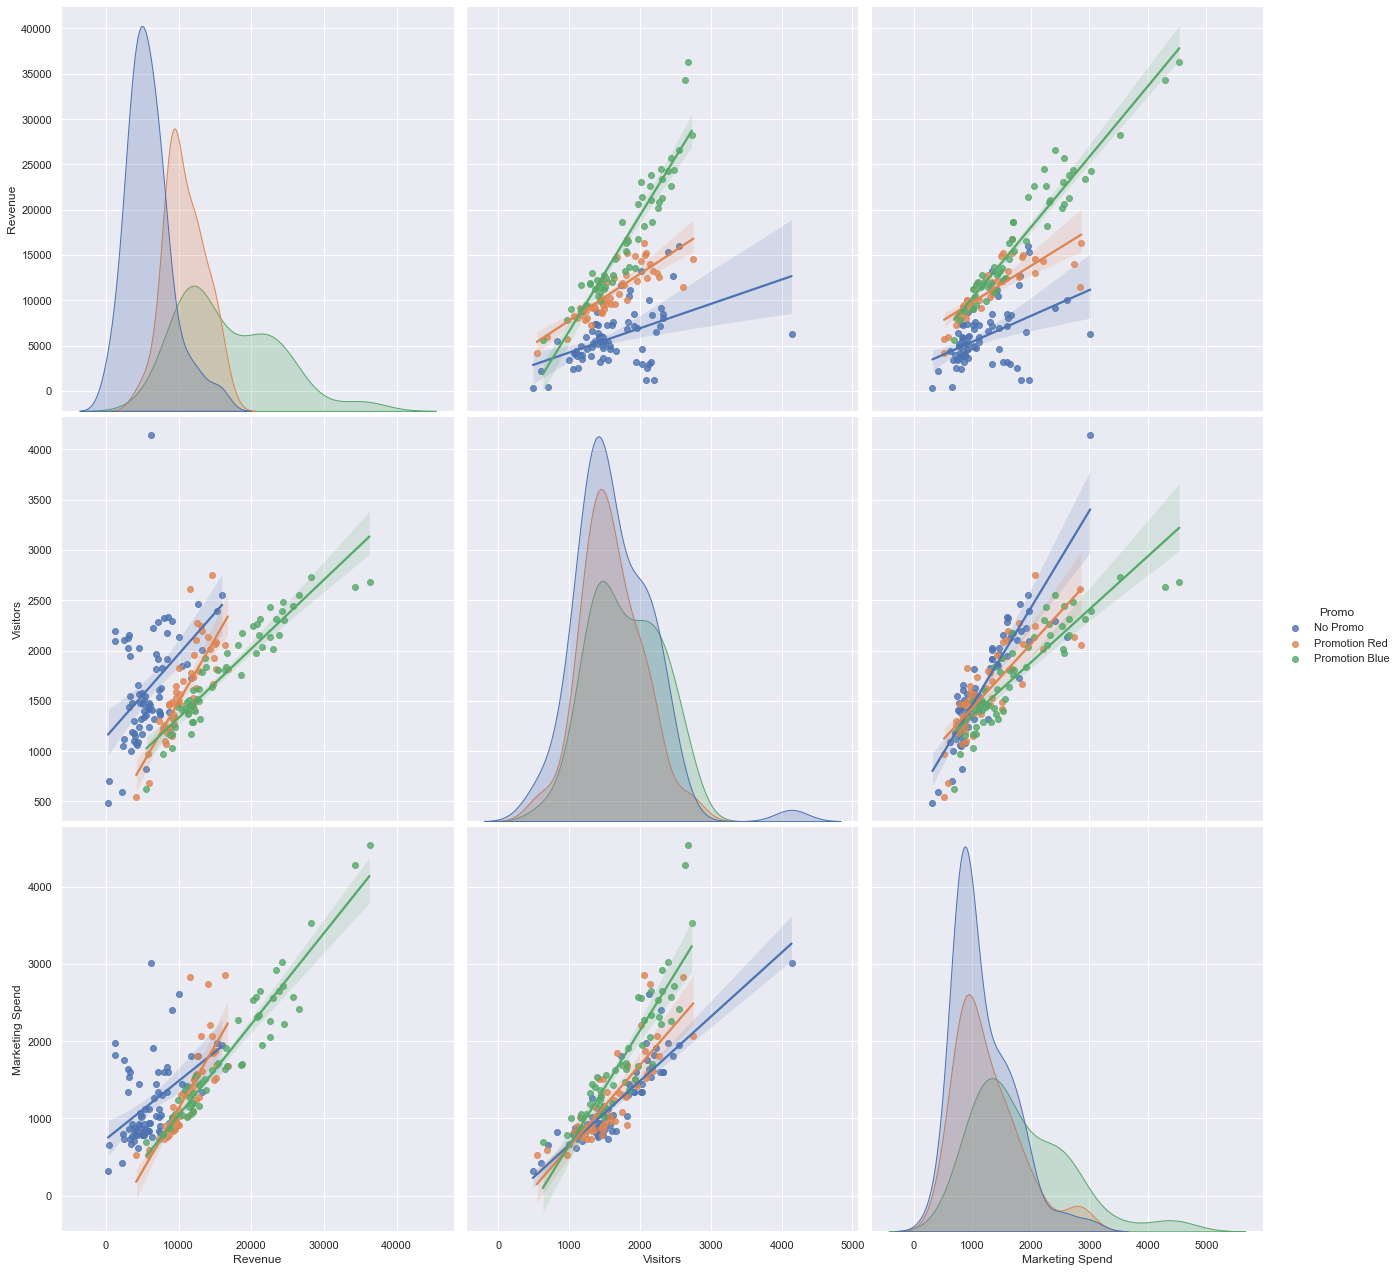

In [36]:
# Example 4 - running on specific columns - adding hue - adding kind = reg
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']], hue = 'Promo', kind="reg", height = 6)


### More on Pairplots:
https://seaborn.pydata.org/generated/seaborn.pairplot.html

## 10. JoinPlots
#### Draw a plot of two variables with bivariate and univariate graphs.

C:\Users\erbo4946\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


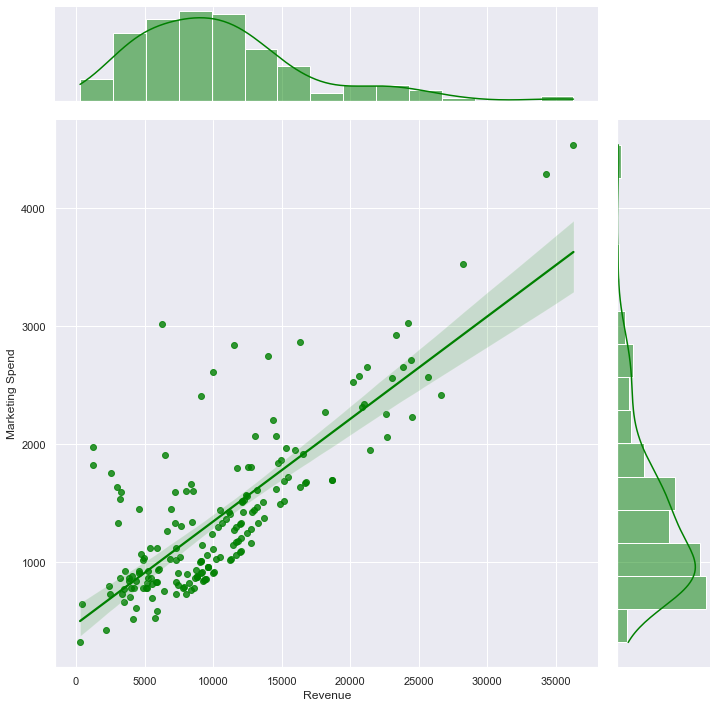

In [37]:
# Example 1 - Revenue vs marketing Spend Relationship with 
g = sns.jointplot("Revenue", "Marketing Spend", data=raw_data, kind="reg", color = 'green', height = 10)

## 11. Heat Map

In [38]:
# First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
# .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
# The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
# More Info here: https://statisticsbyjim.com/basics/correlations/

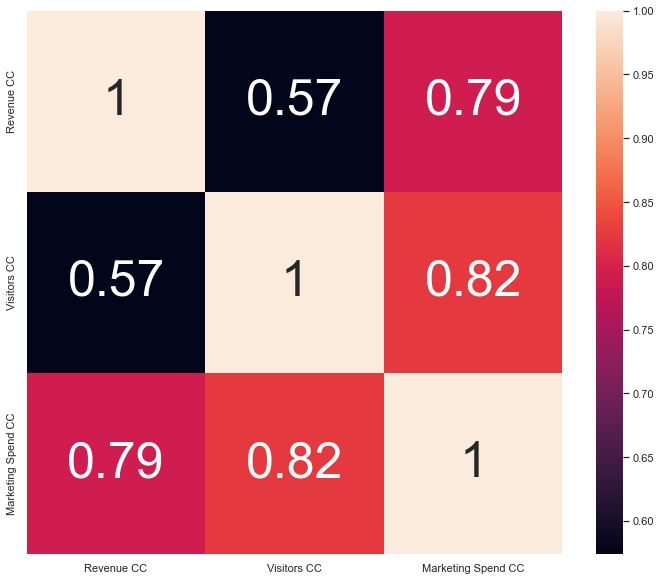

In [39]:
# Example 1 - Heatmap for PC

pc = raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']].corr(method ='pearson')

cols = ['Revenue CC','Visitors CC','Marketing Spend CC']

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50})


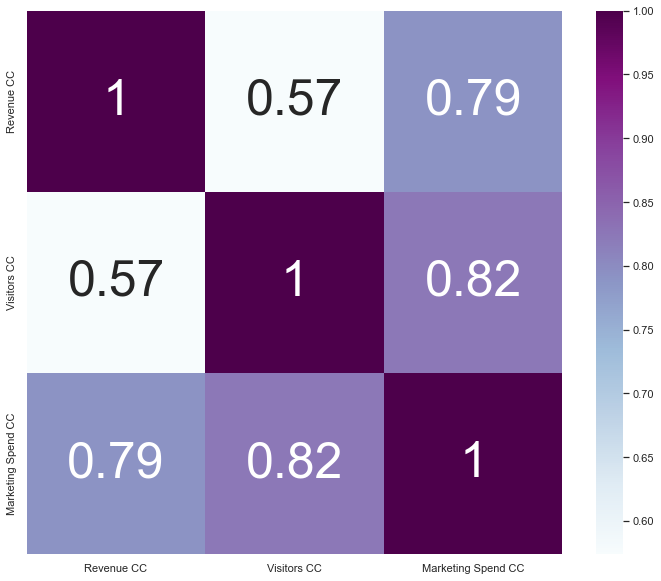

In [40]:
# Example 2 - Heatmap for PC - changing cmap

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50},
                 cmap="BuPu")

# Examples:
# cmap="YlGnBu"
# cmap="Blues"
# cmap="BuPu"
# cmap="Greens"

### More details for Heatmaps here:
https://seaborn.pydata.org/generated/seaborn.heatmap.html